In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
from scipy.linalg import lu
from numpy import linalg as LA

### Teil A

In [15]:

#Spalten nach Aufgabenstellung

#1.Erste Spaltte: Zahl von 2 bis 13
erste=np.arange(2,14,1)

x=[]
zweite=[]
dritte=[]
vierte=[]
fuenfte=[]
sechste=[]

for i in erste:
    
    A=hilbert(i)
    m,n=A.shape
    x=np.zeros(m)
    x[0]=1
    x[n-1]=1
    b = A[:,0] + A[:,n-1]
    
    #2.Spalte: Inf-Norm
    konditionszahl=(LA.cond(A, np.inf))
    zweite.append(konditionszahl)
    
    
    #3. Spalte: Relative Fehler mit xbs=A\b
    xbs=np.asarray(LA.solve(A,b))
    dritte.append(LA.norm(x-xbs, np.inf)/LA.norm(x, np.inf))  
    
    #4. Spalte: Relative Fehler (xlr) mit [L,R,P]=lu(A) - LR-Zerlegung mit Permutationsmatrix
    P, L, U = lu(A) 
    y = LA.solve(P,b)
    z = LA.solve(L,y)
    xlr = LA.solve(U,z)
    vierte.append(LA.norm(x-xlr, np.inf)/LA.norm(x, np.inf))
    
    #5. Spalte: Relative Fehler (xchol) R=chol(A) mit Cholensky-Zerlegung
    L = LA.cholesky(A)
    y = LA.solve(L,b)
    xchol = LA.solve(L.T,y)
    fuenfte.append(LA.norm(x-xchol, np.inf)/LA.norm(x, np.inf))
    
    #6. Spalte: ||Axchol-b||_inf
    X = np.matmul(A,xchol)
    sechste.append(LA.norm(X-b, np.inf))
    
# #Ausgabe der Daten     
zweite=np.asarray(zweite, dtype=np.float64)
zweite=zweite*10e-16

xspalte=['Erste','Zweite','Dritte','Vierte','Fünfte','Sechste']
T1=pd.concat([pd.DataFrame(erste),pd.DataFrame(zweite),pd.DataFrame(dritte),pd.DataFrame(vierte),pd.DataFrame(fuenfte),pd.DataFrame(sechste)],axis=1)
print(T1.to_string(index=False,header=xspalte))
 
    

Erste       Zweite       Dritte       Vierte       Fünfte      Sechste
    2 2.700000e-14 6.661338e-16 6.661338e-16 7.771561e-16 0.000000e+00
    3 7.480000e-13 3.330669e-16 3.330669e-16 1.272771e-15 0.000000e+00
    4 2.837500e-11 3.269052e-13 3.269052e-13 2.801530e-13 5.551115e-17
    5 9.436560e-10 3.652503e-12 3.652503e-12 2.855900e-12 1.110223e-16
    6 2.907028e-08 1.772227e-10 1.772227e-10 1.426533e-10 1.110223e-16
    7 9.851949e-07 2.942705e-09 2.942705e-09 3.994468e-09 2.220446e-16
    8 3.387279e-05 4.390995e-08 4.390995e-08 5.172726e-08 2.220446e-16
    9 1.099650e-03 1.641801e-06 1.641801e-06 1.988295e-06 2.220446e-16
   10 3.535295e-02 4.916761e-05 4.916761e-05 5.322598e-05 2.220446e-16
   11 1.230504e+00 3.068096e-04 3.068096e-04 5.430272e-04 2.775558e-17
   12 3.920201e+01 4.506061e-02 4.506061e-02 6.927755e-02 2.220446e-16
   13 8.534954e+02 1.825955e+00 1.825955e+00 2.173374e+00 2.220446e-16


#### Betrachtungen

1. Ab 14 sind Hilbert-Matrizen wegen Rechnergenauigkeit für den Rechner nicht mehr positiv definit,so dass insobesondere die Cholesky-Zerlegung von der Bibliothek Numpy nicht mehr verwendet werden kann und die andere Lösungen in gewisser Wiese nicht mehr stimmen.
2. Der Cholesky Algorithmus schneidet am schlechtesten ab, weil er den größten relativen Fehler hat.
3. Mit einer größeren Ordnung der Hilbert Matrix steigt die Konditionszahl der Matrix und damit auch der relative Fehler.Dies liegt daran, dass die Konditionszahl umso größer wird, je größer die Hilbert-Matrix ist und je linearer die Abhängigkeit der Zeilen und Spalten ist, was je nach Exponentialordnung die Genauigkeit der Berechnungen zur Lösung der Gleichung Ax=b beeinflusst. Für die Hilbert-Matrix der Ordnung 13 wurde eine Konditionszahl von sogar 8,5349539e+17 erreicht, was eine Ordnung von e+17 mit 17 Stellen Genauigkeit für die Berechnung von x bedeuten würde. 
   


### Teil B

In [10]:
def tridiagloes(a,b,f):
    m = np.shape(f)
    m = int(m[0])
    
    y = np.zeros(m, dtype=float)
    x = np.zeros(m, dtype=float)
    c = np.zeros(m, dtype=float)
    d = np.zeros(m-1, dtype=float) 
    
    # Koeffizienten ausrechnen
    c[0] = math.sqrt(a[0])  
    for i in range(1,m):
        d[i-1] = (b[i-1])/(c[i-1])
        c[i] = np.sqrt(a[i]-((d[i-1])**2))
 
    # Vorwärt/ Rückwärts einsetzen
    y[0] = f[0]/c[0]
    for j in range(1,m):
        y[j] = (f[j]-d[j-1]*y[j-1])/(c[j])
    
    x[m-1] = y[m-1]/c[m-1]
    for k in reversed(range(m-1)):
        x[k] = (y[k]-d[k]*x[k+1])/(c[k])
    
    
    return(x)
    

In [11]:
# Aufgabe 4 anwenden:
n = 3
f = np.ones(n, dtype=float)
s = np.ones(n, dtype=float)

a = np.zeros(n, dtype=float)
b = np.zeros(n-1, dtype=float)

for l in range(n-1):
    a[l] = s[l] + s[l+1]
a[n-1] = s[n-1]
for m in range(n-1):
    b[m] = s[m]*-1
    
# Aufruf der Funktion:
u = tridiagloes(a,b,f)
print("Die Auslenkung der Ferderkette wird von folgendem Vektor beschrieben:",u)

Die Auslenkung der Ferderkette wird von folgendem Vektor beschrieben: [3. 5. 6.]


### Teil C

In [12]:
def cart2pol(A, t):
    
    #Karthesische Koordinaten 
    x = np.copy(A[0])
    y = np.copy(A[1])
    
    #Polar-Koordinaten
    phi = np.linspace(0, t, len(x))
    # rho = np.sqrt(x**2 + y**2)
    rho=7
    
    #Transformation
    for i in range(len(x)):
        # print(f'i: {i}, rho: {rho[i]}, phi:{phi[i]}')
        x[i] = rho*math.cos(phi[i])
        y[i] = rho*math.sin(phi[i])
    
    
    return np.column_stack((x,y))


U: [[-0.50085733 -0.86552986]
 [-0.86552986  0.50085733]] 

S: [[1.25344407 0.        ]
 [0.         0.75344407]] 

V: [[-0.86552986 -0.50085733]
 [-0.50085733  0.86552986]] 



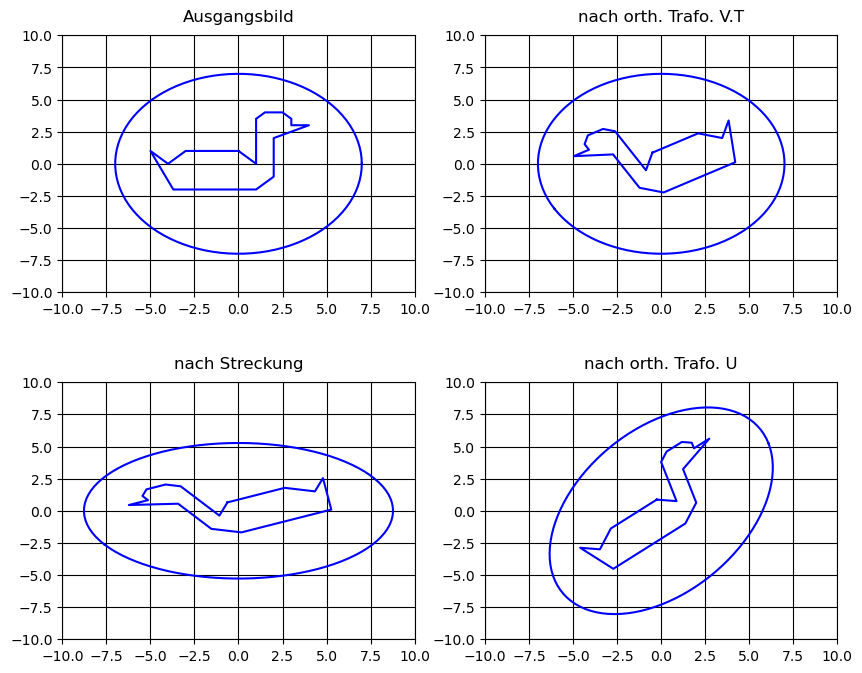

In [13]:
ente=np.array([[0, 1, 1, 1.5 ,2.5 ,3, 3, 4, 2, 2, 1, -3.7, -5, -4, -3, 0],
              [1, 0, 3.5, 4, 4, 3.5, 3, 3, 2, -1, -2, -2, 1, 0, 1, 1]])

A=np.array([[0.87, -0.25],
            [0.75, 0.87]])

kreis = cart2pol(np.zeros((2,100)), 2*math.pi)

U, S, V = LA.svd(A)

S = np.diag(S)

print(f'U: {U} \n')
print(f'S: {S} \n')
print(f'V: {V} \n')


f1= plt.figure(figsize=(10,8), dpi=100)

# 1.Subplot: Ausgangsbild
ax1 = plt.subplot(2,2,1)

plt.title("Ausgangsbild", pad ='10')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 

plt.plot(ente[0,:], ente[1,:], color='blue') 
plt.plot(kreis[:,0], kreis[:,1], color='blue') 

# 2.Subplot: nach orth. Trafo. V.T

ax2 = plt.subplot(2,2,2)

plt.title("nach orth. Trafo. V.T", pad ='10')

ente2= V.dot(ente)
kreis2 = V.dot(kreis.T)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 

plt.plot(ente2[0,:], ente2[1,:], color='blue') 
plt.plot(kreis2.T[:,0], kreis2.T[:,1], color='blue') 

# 3.Subplot: nach Streckung

ax3 = plt.subplot(2,2,3)

ente3 = S.dot(ente2)
kreis3 = S.dot(kreis2)


plt.title("nach Streckung", pad ='10')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 


plt.plot(ente3[0,:], ente3[1,:], color='blue')
plt.plot(kreis3.T[:,0], kreis3.T[:,1], color='blue') 


# 4.Subplot: nach orth. Trafo. U

ax4 = plt.subplot(2,2,4)

ente4 = U.dot(ente3)
kreis4 = U.dot(kreis3)

plt.title("nach orth. Trafo. U", pad ='10')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 

plt.plot(ente4[0,:], ente4[1,:], color='blue')
plt.plot(kreis4.T[:,0], kreis4.T[:,1], color='blue') 
 
#Plots Einstellungen
plt.subplots_adjust(hspace=0.35)
plt.show() 